# Part I - Ford GoBike Data System
## by Gozie Achebe

## Introduction
> **Ford GoBike Data System** is a dataset that features information about the individual rides made in a bike-sharing system. This dataset covers the greater San Farncisco Bay area.
 


## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Loading Ford GoBike Data into pandas dataframe called `ford`


In [3]:
ford = pd.read_csv('fordbike.csv');
ford.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


In [4]:
#Checking the shape of the dataframe
ford.shape

(183412, 16)

In [5]:
#Looking at the columns available
ford.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [6]:
# More information on `ford`
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
# Looking at the null values present in the dataset
ford.isna().sum().sum()

17318

In [8]:
# I have to drop all the NaN values so they don't affect my calculations
droped_ford = ford.dropna(inplace=True)

In [9]:
ford.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [10]:
# I will get rid of duplicates
ford.drop_duplicates()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


### What is the structure of your dataset?

> The structure of this dataframe is 174952  rows and 16 columns

### What is/are the main feature(s) of interest in your dataset?

> **The Following are the Features of Interest:**<br> 1. To understand if Gender plays a role in the Duration covered<br> 2. If age is a factor in Cycling 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> **The Features in the Dataset that Can Help are:** <br> duration_sec, start_time, end_time, velocity, displacement,start_station_name, end_station_name, bike_id,	user_type,	member_birth_year,	member_gender,	bike_share_for_all_trip

#### More Columns to Add
> I will need to add the column as the need arises but for now, I noted that I will add displacement for distance between two stations. Therefore I will calculate from the given longitudes and latitudes

In [11]:
from math import acos, asin, cos, pi, radians, sin, sqrt

#Using  Haversine formula to get the displacement between two points
def displ(latt1,longt1,latt2,longt2):
    '''This function takes 4 Parameters
        latitude1, longitude1, latitude2, longitude2
    '''
    lat1 = radians(latt1)
    long1 = radians(longt1)
    lat2 = radians(latt2)
    long2 = radians(longt2)
    try: 
        displa = 3963.0 * acos((sin(lat1) * sin(lat2)) + (cos(lat1) * cos(lat2) * cos(long2 - long1)))
        return float('%.2f' % displa)
    except:
        return float('%.2f' % 0)


In [12]:
# Creating new column called `displacement`
ford['displacement'] = ford.apply(lambda x: displ(x['start_station_latitude'],x['start_station_longitude'],x['end_station_latitude'],x['end_station_longitude']),axis=1)
ford.sample(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,displacement
18870,192,2019-02-26 17:54:02.2150,2019-02-26 17:57:15.0350,327.0,5th St at San Salvador St,37.332039,-121.881766,295.0,William St at 10th St,37.332794,-121.875926,4011,Subscriber,1997.0,Male,Yes,0.33
62952,200,2019-02-20 16:15:07.5760,2019-02-20 16:18:28.3080,274.0,Oregon St at Adeline St,37.857567,-122.267558,266.0,Parker St at Fulton St,37.862464,-122.264791,6454,Subscriber,1985.0,Male,No,0.37


In [13]:
# Checking the displacements that are zeros
dis0 = ford[ford.displacement == 0]

#### Observation
>Some users left a station only to return to the same station after sometimes

In [14]:
# columns for start day and end day
#convert string to date
ford['start_time'] = pd.to_datetime(ford.start_time, format='%Y-%m-%d %H:%M:%S')
ford['end_time'] = pd.to_datetime(ford.end_time, format='%Y-%m-%d %H:%M:%S')

In [15]:

#create hour, day, month and year for start time
ford['start_hour'] = ford['start_time'].dt.hour
ford['start_day'] = ford['start_time'].dt.day

#create hour, day, month and year for end time
ford['end_hour'] = ford['end_time'].dt.hour
ford['end_day'] = ford['end_time'].dt.day
ford['end_year'] = ford['end_time'].dt.year

In [16]:
# change member_birth_year to int from float
ford["member_birth_year"] = ford["member_birth_year"].astype(int)
# ford.end_year.describe()

In [17]:
# Remove anyone born 1925 and beyound. They are not suppose to be riding bicycle
ford = ford[ford.member_birth_year > 1925.0]

In [18]:
ford.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,displacement,start_hour,start_day,end_hour,end_day,end_year
count,174877.000000,174877.000000,174877.000000,174877.000000,174877.000000,174877.000000,174877.000000,174877.000000,174877.00000,174877.000000,174877.000000,174877.000000,174877.000000,174877.000000,174877.0
mean,704.026007,138.980386,37.771206,-122.351758,136.604127,37.771401,-122.351335,4482.533941,1984.83907,1.051169,13.456115,15.312111,13.609491,15.311488,2019.0
std,1642.528644,111.636777,0.100409,0.117747,111.333164,0.100313,0.117310,1659.215664,9.97047,0.682197,4.734410,8.033983,4.748160,8.034184,0.0
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1927.00000,0.000000,0.000000,1.000000,0.000000,1.000000,2019.0
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.00000,0.570000,9.000000,8.000000,9.000000,8.000000,2019.0
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.00000,0.890000,14.000000,15.000000,14.000000,15.000000,2019.0
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.00000,1.380000,17.000000,22.000000,18.000000,22.000000,2019.0
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.00000,43.210000,23.000000,28.000000,23.000000,28.000000,2019.0


#### Add coulmn for age

In [19]:
#### Add coloumn for age
ford['age'] = ford.end_year - ford.member_birth_year
ford.sample(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,displacement,start_hour,start_day,end_hour,end_day,end_year,age
91983,152,2019-02-15 20:55:58.565,2019-02-15 20:58:30.874,177.0,MacArthur Blvd at Telegraph Ave,37.826286,-122.265100,192.0,37th St at West St,37.826696,...,1977,Male,No,0.37,20,15,20,15,2019,42
87946,545,2019-02-16 21:06:48.986,2019-02-16 21:15:54.828,58.0,Market St at 10th St,37.776619,-122.417385,47.0,4th St at Harrison St,37.780955,...,1994,Male,No,1.01,21,16,21,16,2019,25


## Univariate Exploration

> In this section, I will take univariate exploration in the format "**Question-Visualization-Observations repeatedly**


#### Question 1 - Which gender in the distribution of Ford GoBike data patronises the share bicycle system the most?

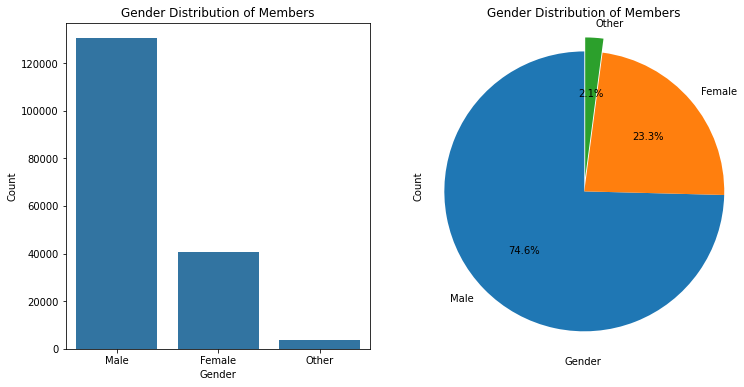

In [20]:
#bar chart
plt.rcParams["figure.figsize"] = (12,6)
fig8, (ax8,ax9) = plt.subplots(1,2,)
order = ford.member_gender.value_counts()
color = sb.color_palette()[0]
sb.countplot(x = ford.member_gender, ax=ax8, order=order.index, color=color)
ax8.set_xlabel("Gender")
ax8.set_ylabel("Count")
ax8.set_title("Gender Distribution of Members")

# pie chart
gender = ford.member_gender.value_counts()
explode = [0,0,0.1]
plt.pie(x = gender,autopct='%1.1f%%',
        shadow=False, startangle=90,explode=explode,labels=order.index);
ax9.axis('equal')
plt.xlabel("Gender")
plt.ylabel("Count")
# plt.legend()
plt.title("Gender Distribution of Members");

#### Observation
> The male are more in number. Up to 74.6% percent of the whole members are male. There are few that did not specify gender, 2.1% percent of them. The male patronises the bicycle share system

### Question 2 - What are the types of users or members and what is their distribution

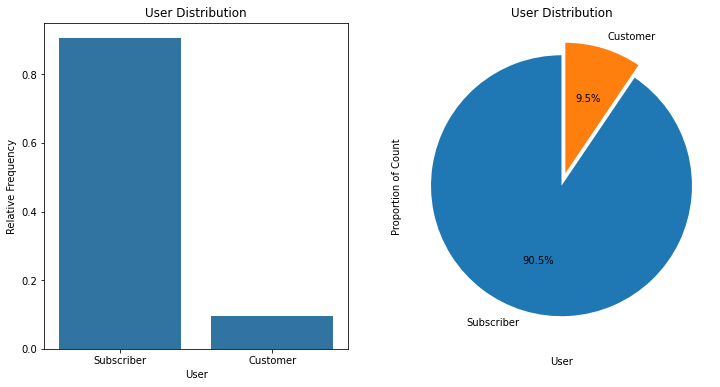

In [21]:
# Barchart and pie chart
#bar chart
# plt.rcParams["figure.figsize"] = (12,6)
fig3, (ax3,ax4) = plt.subplots(1,2)
mydata = ford['user_type'].value_counts(normalize = True).reset_index().rename({'index':'user_type','user_type':'percent'}, axis =1)
order = ford.user_type.value_counts(normalize = True)
color = sb.color_palette()[0]
# # sb.countplot(x = ford.user_type, ax=ax3, data=mydata, order=order.index, color=color)
# sb.countplot(x = ford.user_type, ax=ax3, data=mydata, order=order.index, color=color)
sb.barplot(x="user_type", y='percent', data=mydata, color = color, ax= ax3)
ax3.set_xlabel("User")
ax3.set_ylabel("Relative Frequency")
ax3.set_title("User Distribution")



# pie chart
ax4.axis('equal')
user = ford.user_type.value_counts(normalize = True)
explode = [0,0.1]
plt.pie(x = user,autopct='%1.1f%%',
        shadow=False, startangle=90,explode=explode,labels=order.index, );

plt.xlabel("User")
plt.ylabel("Proportion of Count")
# plt.legend()
plt.title("User Distribution");

##### Observation
> They are only two types of users: Subscriber and Customer. Subscribers are 90.5% of the total users

### Question 3 - What is the most common distance between start stations and end stations

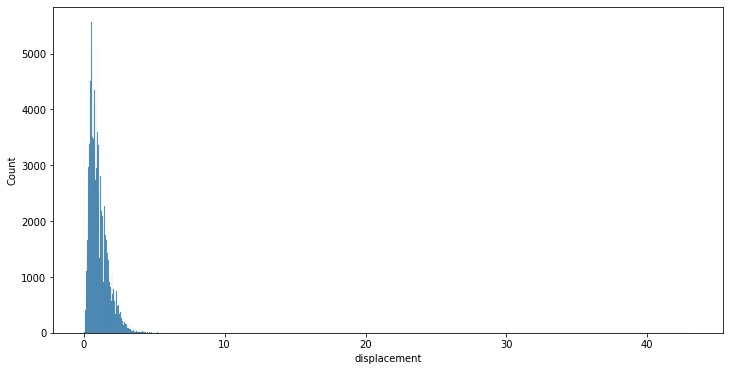

In [22]:

# fig5, (ax5) = plt.subplots(1,1)
sb.histplot(data=ford,x='displacement');
# ax5.set_xlabel("Distances Between Stations (Miles)")
# ax5.set_ylabel("Count")
# ax5.set_title("Histogram of the Distances Between to Stations");


> This is right skewed. Distances between start and end destinations are relatively small

Text(0.5, 1.0, 'Histogram of the Log Function Distances Between to Stations')

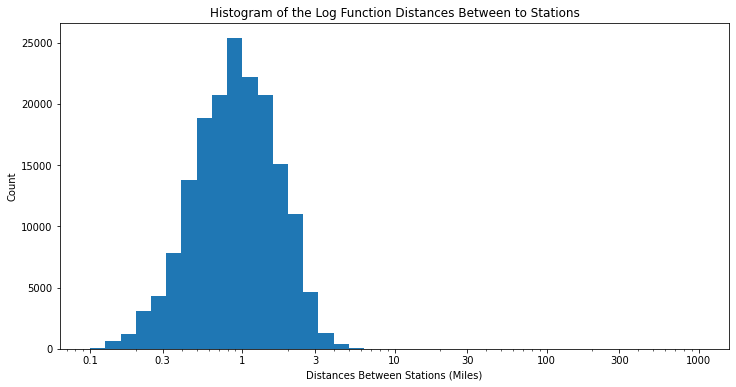

In [23]:
# using logarithm scale
fig13, (ax13) = plt.subplots(1,1)
bins = 10**np.arange(-1,3 + 0.1, 0.1)
ticks = (0.1,0.3,1,3,10,30,100,300,1000)
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = ford, x = 'displacement', bins= bins);
plt.xscale('log')
plt.xticks(ticks,labels);
ax13.set_xlabel("Distances Between Stations (Miles)")
ax13.set_ylabel("Count")
ax13.set_title("Histogram of the Log Function Distances Between to Stations")

> This distribution in unimodal. This occurs around 1 mile in this case

#### Question 4 - What is the age of the majority of the riders?

Text(0.5, 1.0, 'Histogram of the Distribution of Ages of the Riders')

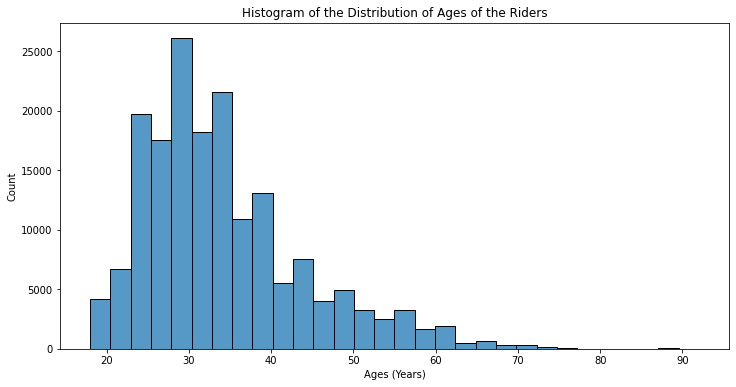

In [24]:
# histogram plot for age
fig10, (ax10) = plt.subplots(1,1)
sb.histplot(data=ford,x='age', bins=30);
ax10.set_xlabel("Ages (Years)")
ax10.set_ylabel("Count")
ax10.set_title("Histogram of the Distribution of Ages of the Riders")

>Majority of the riders are in their 30's

#### Question 5 - What are the major stations

Text(0.5, 1.0, 'Histogram of the Start Station')

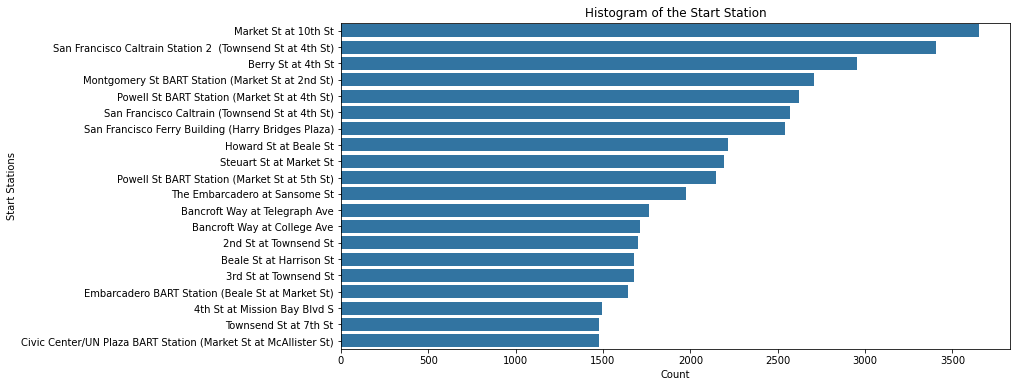

In [25]:
#bar chart for start stations
fig11, ax11 = plt.subplots(1,1)
order = ford.start_station_name.value_counts()[:20]
color = sb.color_palette()[0]
sb.countplot(y = ford.start_station_name, ax=ax11, order=order.index, color=color)
ax11.set_ylabel("Start Stations")
ax11.set_xlabel("Count")
ax11.set_title("Histogram of the Start Station")

Text(0.5, 1.0, 'Histogram of the End Station')

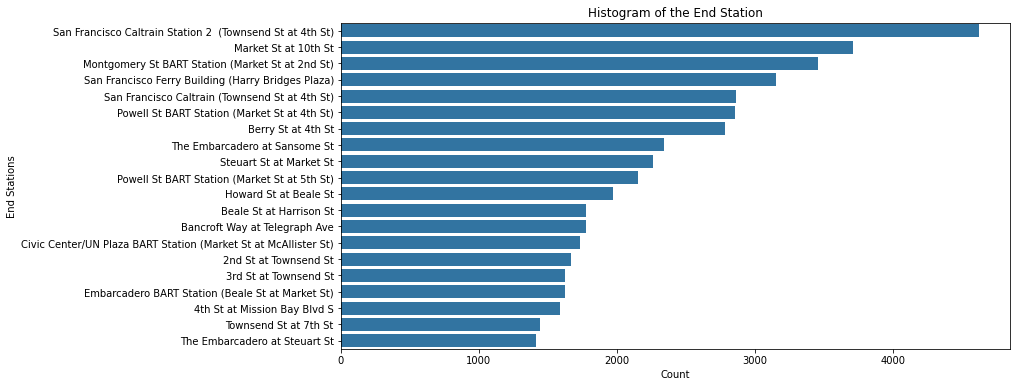

In [26]:
#bar chart for end stations
fig11, ax11 = plt.subplots(1,1)
order = ford.end_station_name.value_counts()[:20]
color = sb.color_palette()[0]
sb.countplot(y = ford.end_station_name, ax=ax11, order=order.index, color=color)
ax11.set_ylabel("End Stations")
ax11.set_xlabel("Count")
ax11.set_title("Histogram of the End Station")

> Most of the popular stations in the start_stations are also popular in the end_station. They are really popular stations. San Francisco Caltrain Station 2(Townsen St at 4t St) and Market St at 10th St are the most popular stations

#### Question 6 - On which day of the month the riders had the highest number trips

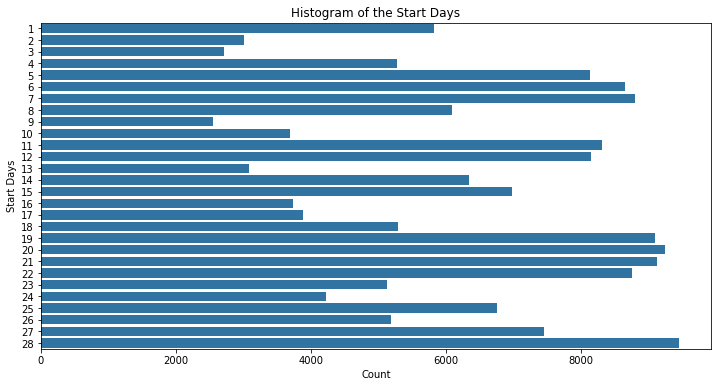

In [27]:
#bar chart for start days
fig11, ax11 = plt.subplots(1,1)
order = ford.start_day.value_counts()
color = sb.color_palette()[0]
sb.countplot(y = ford.start_day, ax=ax11, color=color)
ax11.set_ylabel("Start Days")
ax11.set_xlabel("Count")
ax11.set_title("Histogram of the Start Days");
#  order=order.index,

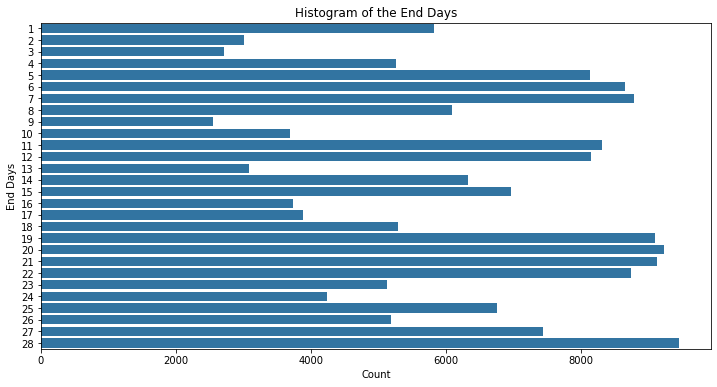

In [28]:
#bar chart for end days
fig11, ax11 = plt.subplots(1,1)
order = ford.end_day.value_counts()
color = sb.color_palette()[0]
sb.countplot(y = ford.end_day, ax=ax11, color=color)
ax11.set_ylabel("End Days")
ax11.set_xlabel("Count")
ax11.set_title("Histogram of the End Days");
# order=order.index, 

>Day 28 is the most occured day in the monyh of February 2019 when the riders had the highest activities

#### Question 7 - At what points in the day do riders picked bicycle most?

Text(0.5, 1.0, 'Histogram of the Start Hours')

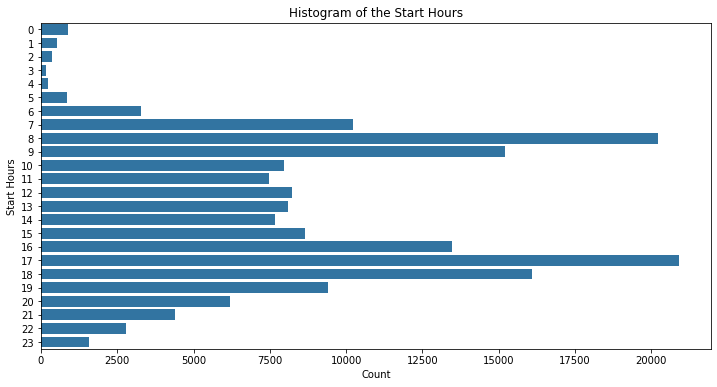

In [29]:
#bar chart for start hour
fig11, ax11 = plt.subplots(1,1)
order = ford.start_hour.value_counts()
color = sb.color_palette()[0]
sb.countplot(y = ford.start_hour, ax=ax11, color=color)
ax11.set_ylabel("Start Hours")
ax11.set_xlabel("Count")
ax11.set_title("Histogram of the Start Hours")
# order=order.index,

Text(0.5, 1.0, 'Histogram of the End Hours')

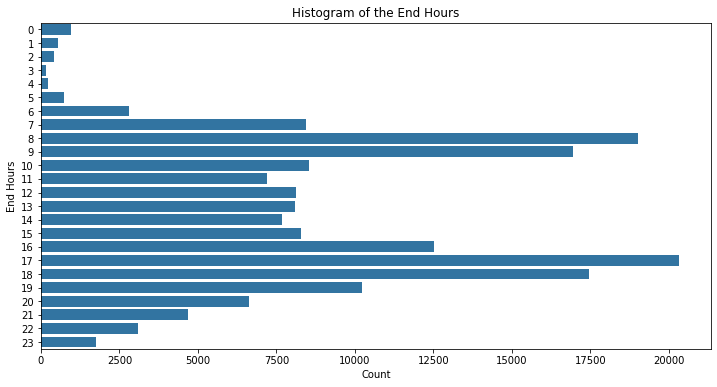

In [30]:
#bar chart for end hour
fig11, ax11 = plt.subplots(1,1)
order = ford.end_hour.value_counts()
color = sb.color_palette()[0]
sb.countplot(y = ford.end_hour, ax=ax11,  color=color)
ax11.set_ylabel("End Hours")
ax11.set_xlabel("Count")
ax11.set_title("Histogram of the End Hours")
#order=order.index,

> The hours are 7-9 am and 4-6pm having 8am and 5pm as the peak hour

#### Question 8 - What is the common duration a user will be in possession of the bicycle

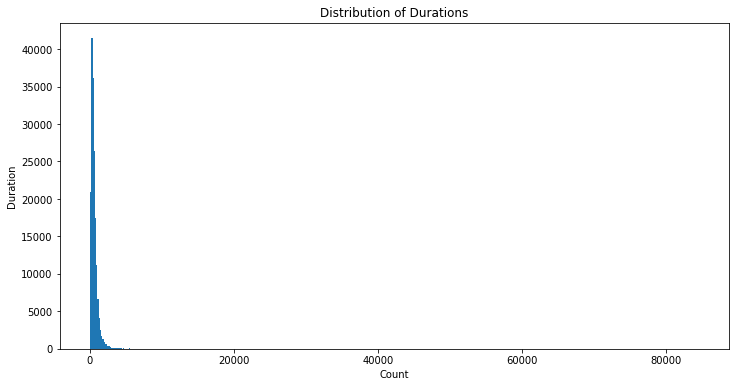

In [31]:
#duration histogram
fig11, ax11 = plt.subplots(1,1)
order = ford.duration_sec.value_counts()
color = sb.color_palette()[0]
plt.hist(data = ford, x = 'duration_sec', bins= 500)
ax11.set_ylabel("Duration")
ax11.set_xlabel("Count")
ax11.set_title("Distribution of Durations");

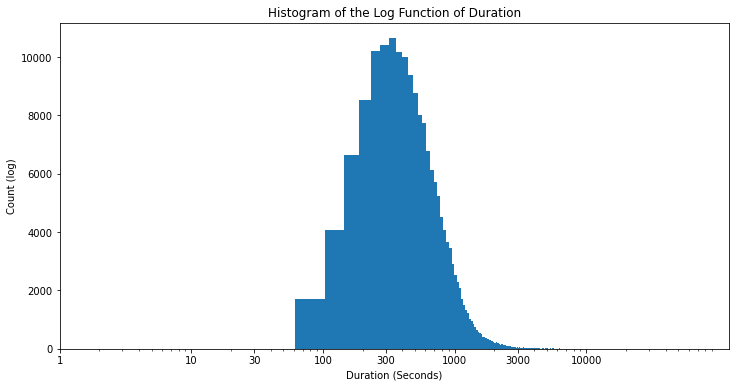

In [32]:
# using logarithm scale
fig13, (ax13) = plt.subplots(1,1)
# bins = 10**np.arange(0,len(ford.duration_sec) + 0.1, 500)
ticks = (1,10,30,100,300,1000,3000,10000)
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = ford, x = 'duration_sec', bins= 2000);
plt.xscale('log')
plt.xticks(ticks,labels);
ax13.set_xlabel("Duration (Seconds)")
ax13.set_ylabel("Count (log)")
ax13.set_title("Histogram of the Log Function of Duration");

> The common duration of the bikers is around 300 seconds

#### Question 9 - What is the percentage of those that share bike

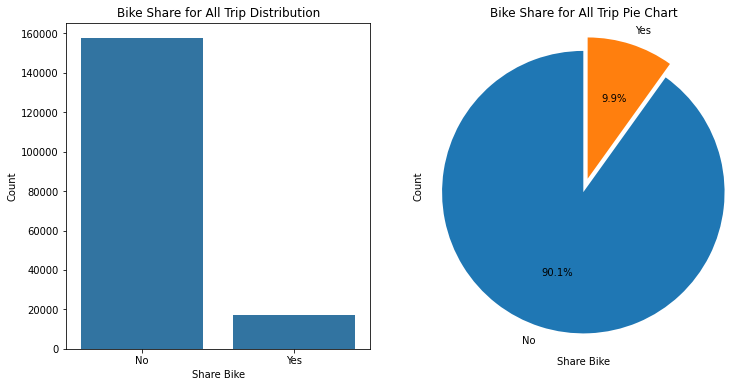

In [33]:
#bar chart
fig8, (ax8,ax9) = plt.subplots(1,2,)
order = ford.bike_share_for_all_trip.value_counts()
color = sb.color_palette()[0]
sb.countplot(x = ford.bike_share_for_all_trip, ax=ax8, order=order.index, color=color)
ax8.set_xlabel("Share Bike")
ax8.set_ylabel("Count")
ax8.set_title("Bike Share for All Trip Distribution")

# pie chart
gender = ford.bike_share_for_all_trip.value_counts()
explode = [0,0.1]
plt.pie(x = gender,autopct='%1.1f%%',
        shadow=False, startangle=90,explode=explode,labels=order.index);
ax9.axis('equal')
plt.xlabel("Share Bike")
plt.ylabel("Count")
# plt.legend()
plt.title("Bike Share for All Trip Pie Chart");

> Just 9.9% shared bike.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I investigated the following variables of interest: **Gender -** From this I found out that the male are more in number. Up to 74.6% percent of the whole members are male. There are few that did not specify gender, 2.1% percent of them. The male patronises the bicycle share system.  **Riders' Ages -** Majority of the riders are in their 30's. **Day and Duration-** The riders at most times come in the evening to pick bicycle at the hours between 16 and 18 having the middle 17 as the peak time or in the morning between 7 and 9 having the middle 8 as the peak of morning session and at most times spend only about 300 seconds to the next station 

> The birth year 1925 and beyond were dropped because that should be wrong birth year for someone that can ride bicycle. Use logaritmic scale to have better view of the histogram for duration 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I investigated the following: **Users** -They are only two types of users: Subcriber and Customer. Subcribers are 90.5% of the total users. **Distance Between Stations -** Distances between start and end stations are relatively small. This is at the average of 1 mile. **Stations -** Most of the popular stations in the start_stations are also popular in the end_station. They are really popular stations. San Francisco Caltrain Station 2(Townsen St at 4t St) and Market St at 10th St are the most popular stations. **Bike Share -** Only 9.9% of the people tend to share bike


> On distance, I have to use logarithm scale to have better view of the plot as it was initially right skewed greatly. 

## Bivariate Exploration

> In this section, I will do bivariate analysis of the variables I have already done before

#### Question 10: Do older persons share bike?

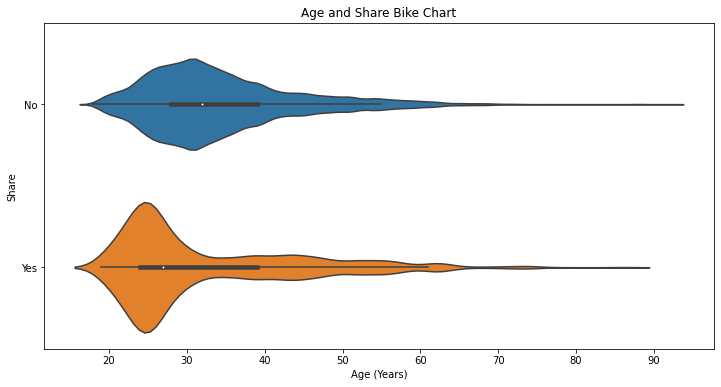

In [34]:
#Age and Share
fig13, (ax13) = plt.subplots(1,1)
sb.violinplot(data=ford, x='age', y = 'bike_share_for_all_trip')
ax13.set_xlabel("Age (Years)")
ax13.set_ylabel("Share")
ax13.set_title("Age and Share Bike Chart");

> From the violinplot, the age that share bike more is the young riders

#### Question 11: Do we have more proportion of yonger male in males than female in females? 

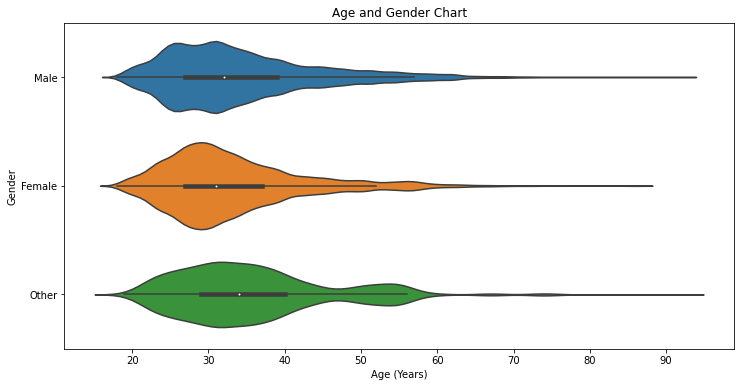

In [35]:
#Age and gender
fig13, (ax13) = plt.subplots(1,1)
sb.violinplot(data=ford, x='age', y = 'member_gender', order=["Male", "Female","Other"])
ax13.set_xlabel("Age (Years)")
ax13.set_ylabel("Gender")
ax13.set_title("Age and Gender Chart");

> The percentage of youger female in females is more than that of male in males. Females have more yonger ones than the males in their ratio

#### Question 12 - Do male riders use the bike longer than the females?

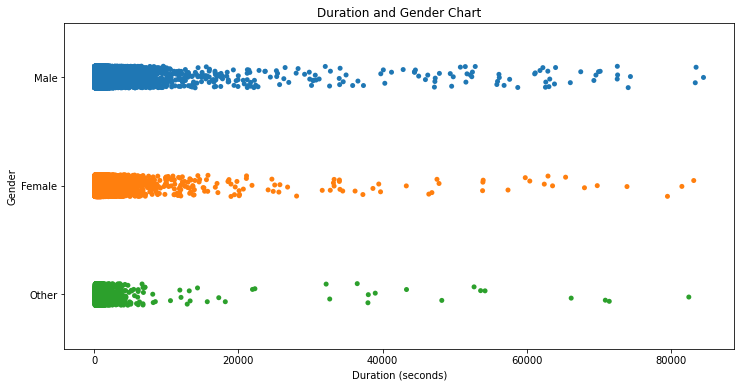

In [36]:
#duration and gender
fig18, (ax18) = plt.subplots(1,1)
sb.stripplot(data=ford, x='duration_sec', y = 'member_gender', ax=ax18 ,order=["Male", "Female","Other"])
ax18.set_xlabel("Duration (seconds)")
ax18.set_ylabel("Gender")
ax18.set_title("Duration and Gender Chart");

> From the plot, there is evidence that males keep bikes a bit longer that the females

#### Question 13: Is peak time for males different from the females?

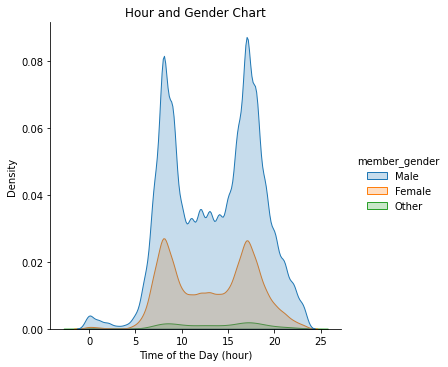

In [37]:
#gender and start hour

sb.displot(ford, x="start_hour", hue="member_gender", kind="kde", fill=True,hue_order=["Male","Female","Other"]);
plt.xlabel("Time of the Day (hour)")
plt.ylabel("Density")
plt.title("Hour and Gender Chart");

> The peak time for males is almost the same for females. There is no significant difference observed in the peak hour for taking bikes

#### Question 14: Is the peak days for males different from females for taking bikes?

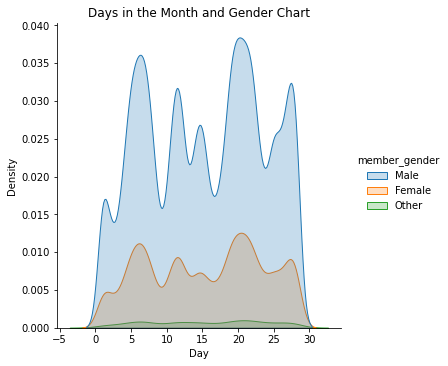

In [38]:
# Days and Gender
sb.displot(ford, x="start_day", hue="member_gender", kind="kde", fill=True,hue_order=["Male","Female","Other"])
plt.xlabel("Day")
plt.ylabel("Density")
plt.title("Days in the Month and Gender Chart");

> I could not find significant difference in peak days. Following the shape of the plot,  they have similar peak days for picking bikes

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The Males' and Females' peak hours for bike collection appear to be the same. In the same vein, their peak days of riding bikes.<br>
Males seem to stay longer with the bike before it is return or taken to the next station. <br> When proportion of younger girls in female. is taken, it is greater than the proportion of younger boys in males. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The youger people tend to share bike

## Multivariate Exploration

> Creating plots of three or more variables to investigate your data even
further. 

#### Question 15: What is the relation between age and gender grouped by user type?

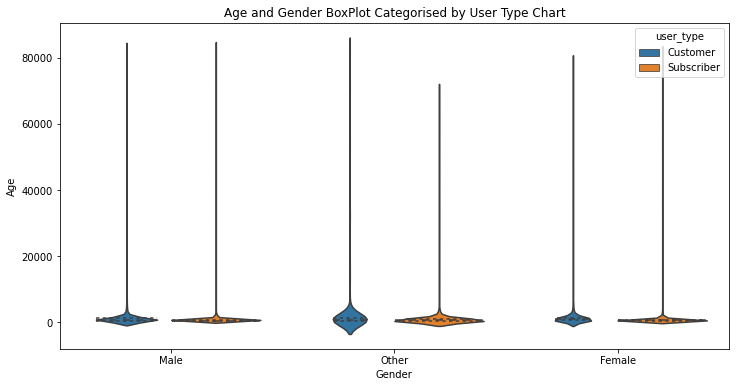

In [39]:
# age, gender and user_type
sb.violinplot(data=ford, y="duration_sec", x="member_gender", hue="user_type", inner='quartile')
plt.ylabel("Age")
plt.xlabel("Gender")
plt.title("Age and Gender BoxPlot Categorised by User Type Chart");

> The duration of the subscribers is less than that of customers for both male and female

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There is no relationship found

### Were there any interesting or surprising interactions between features?

> Nothing found.

## Conclusions

>I investigated on this Ford GoBike Dataset. I did some wrangling that helped me to change types of some varables and also create more columns I would need. I went on to take 15 questions on which I used the plots to find the answers. <br><br>

>My findings from this dataset are: The males are more in number. Up to 74.6% percent of the whole members are male. There are few that did not specify gender, 2.1% percent of them. The male patronises the bicycle share system. Majority of the riders are in their 30's. There is evidence that males keep bikes a bit longer that the females. The peak time for males is almost the same for females. There is no significant difference observed in the peak hour for taking bikes. I could not find significant difference in peak days. They have similar peak days for picking bikes

In [40]:
ford.to_csv('fordbike_copy.csv',index=False)